In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns


df = pd.read_csv(r"C:\\Users\\ishaa\\Downloads\\mall_customer_sample.csv")
print(df.head())
print(df.describe())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5    Male   31                  17                      40
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count    10.00000  10.000000           10.000000               10.000000
mean      5.50000  28.800000           17.000000               49.400000
std       3.02765  13.464356            1.490712               35.094159
min       1.00000  19.000000           15.000000                3.000000
25%       3.25000  21.250000           16.000000               14.250000
50%       5.50000  23.000000           17.000000               56.000000
75%       7.75000  30.750000           18.000000               

In [39]:
df = df.drop(['CustomerID'], axis = 1) #axis == 0 is for rows 
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4    Male   31                  17                      40


In [42]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]] #selecting only these features for clustering
print(X.head())
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       1   31                  17                      40
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0     NaN   19                  15                      39
1     NaN   21                  15                      81
2     NaN   20                  16                       6
3     NaN   23                  16                      77
4     NaN   31                  17                      40


In [43]:
scaler = StandardScaler()
print(scaler) # scaling the features by Making an object of StandardScaler
X_scaled = scaler.fit_transform(X) #first gender was converted to 1 and 0  so that the features can be scaled , else the error was arising that mentioned gender could not me converted to float ( value Error )
print(X_scaled)


StandardScaler()
[[ 1.         -0.76721878 -1.41421356 -0.3123757 ]
 [ 1.         -0.61064352 -1.41421356  0.94914155]
 [-1.         -0.68893115 -0.70710678 -1.30356783]
 [-1.         -0.45406826 -0.70710678  0.82899705]
 [ 1.          0.17223279  0.         -0.28233958]
 [-1.         -0.53235589  0.          0.79896093]
 [-1.          0.48538331  0.70710678 -1.30356783]
 [ 1.         -0.45406826  0.70710678  1.33961118]
 [-1.          2.75572461  1.41421356 -1.39367621]
 [ 1.          0.09394516  1.41421356  0.67881643]]


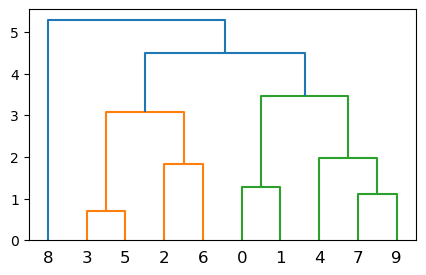

X AXIS --> Number of points
Y AXIS --> Euclidean Distance


In [44]:
# plotting the dendogram for understanding >
plt.figure(figsize=(5,3))
linked = linkage(X_scaled, method='ward') #ward is the method of agglomerative clustering and linkage is a predefined function in scipy for matrix creation for the agglo merative clustering
dendrogram(linked)
plt.show()
print("X AXIS --> Number of points" "\n" "Y AXIS --> Euclidean Distance")

In [60]:
agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')  # Creating an object of AgglomerativeClustering with 3 clusters, euclidean distance metric, and average linkage
labels = agg_cluster.fit_predict(X_scaled)
print(labels)  # Display the cluster labels assigned to each data point

# Add labels to original data
df["Cluster"] = labels
# print(df.head())
print(labels)


[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0]


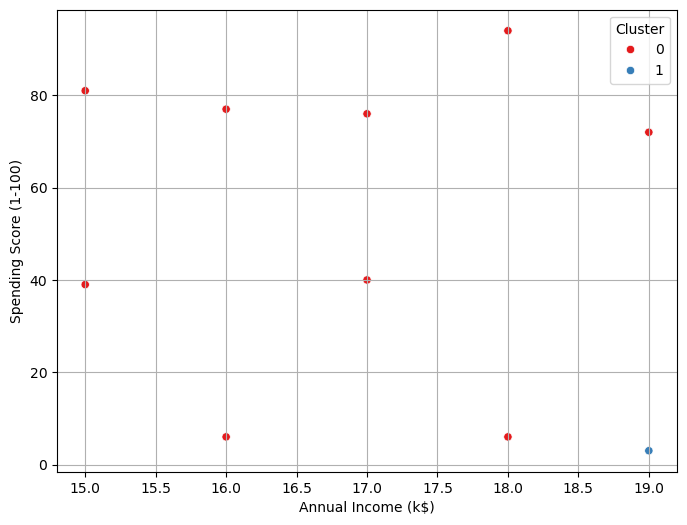

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.grid(True)
plt.show()